In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

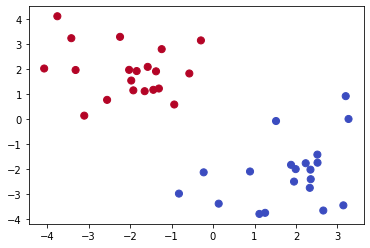

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

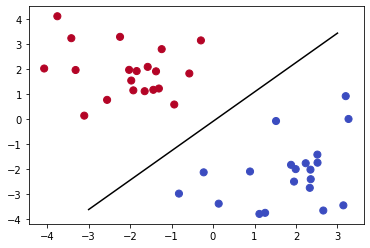

In [3]:
from sklearn import svm

clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-3, 3)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

plt.gca()
plt.plot(x1, x2, 'k-')

plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

plt.axis('tight')
plt.show()

#### b. List the support vectors.

In [4]:
clf.support_vectors_

array([[-0.22627536, -2.11810965],
       [ 1.5180363 , -0.06399383],
       [-0.93564585,  0.5969359 ]])

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

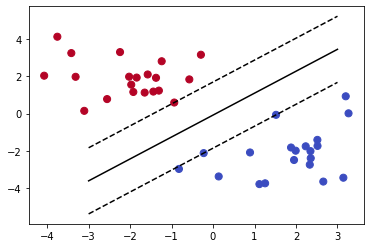

In [5]:
b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

plt.axis('tight')
plt.show()

#### d. Compute the width of the margin.

In [6]:
w = clf.coef_[0]
print(w)
wid = w[1] - w[0]
wid

[-0.66329036  0.56359437]


1.2268847250605666

#### e. What would you expect to happen to the margin if the constant C was made very small?

The parameter C is used to influence misclassfication on training simple. The grater C is, the hyperline will try to get more points classified correctly. Thus, a very small C might lead to some misclassfication.  

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following questions:

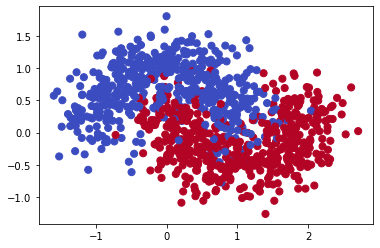

In [7]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


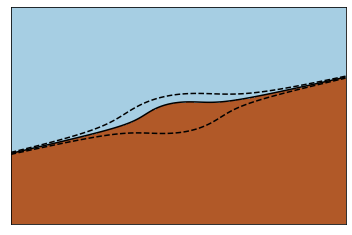

In sample, we successfully predict 87.4 percent of the data


In [8]:
clf = svm.SVC(kernel='poly') 
clf.fit(X, Y)

# Plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10)
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

################################################################################
plt.axis('tight')
x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading = 'auto')
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()

print("In sample, we successfully predict {} percent of the data".format((Y==clf.predict(X)).sum()*100/len(Y)))

In [9]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2999)

clf = svm.SVC(kernel='poly') 
clf.fit(X_train, Y_train)

correct=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)
    
print("Out of sample, we successfully predict {} percent of the data".format((np.mean(correct))*100))


Out of sample, we successfully predict 83.63636363636363 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


In sample degree=1 we most successfully predict 0.8333333333333334 percent of the data
            0         1
0    0.000045  0.554054
30   0.000277  0.554054
31   0.000294  0.554054
32   0.000313  0.554054
33   0.000332  0.554054
..        ...       ...
168  1.139573  0.828829
154  0.489893  0.828829
199  7.389056  0.828829
137  0.175750  0.833333
136  0.165465  0.833333

[200 rows x 2 columns]


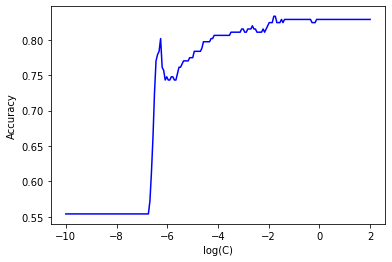

In sample degree=2 we most successfully predict 0.7612612612612613 percent of the data
            0         1
0    0.000045  0.554054
25   0.000264  0.554054
26   0.000283  0.554054
27   0.000303  0.554054
29   0.000349  0.554054
..        ...       ...
139  0.801632  0.761261
137  0.696415  0.761261
131  0.456613  0.761261
143  1.062157  0.761261
141  0.922745  0.761261

[200 rows x 2 columns]


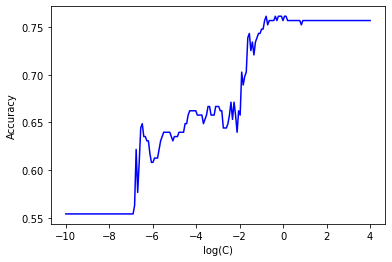

In sample degree=3 we most successfully predict 0.8873873873873874 percent of the data
            0         1
0    0.000045  0.554054
17   0.000178  0.554054
15   0.000152  0.554054
14   0.000140  0.554054
13   0.000129  0.554054
..        ...       ...
111  0.341169  0.882883
110  0.314812  0.882883
107  0.247342  0.882883
119  0.649105  0.882883
114  0.434234  0.887387

[200 rows x 2 columns]


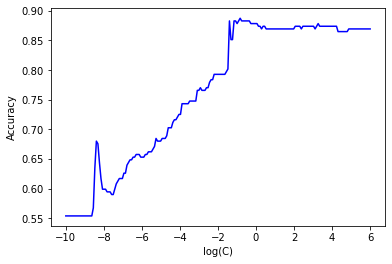

In sample degree=4 we most successfully predict 0.7657657657657657 percent of the data
            0         1
16   0.000193  0.495495
11   0.000123  0.495495
12   0.000134  0.495495
13   0.000147  0.495495
14   0.000161  0.495495
..        ...       ...
121  2.572102  0.752252
123  3.082152  0.756757
120  2.349662  0.756757
122  2.815601  0.761261
119  2.146458  0.765766

[200 rows x 2 columns]


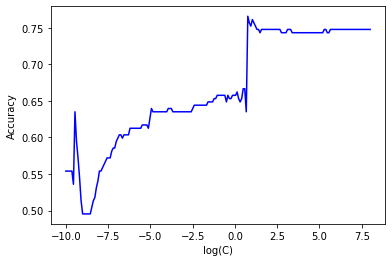

In [15]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here
import math
for i in range(1,5):
    C = [math.exp(i) for i in np.linspace(-10,2*i,200)] 
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',degree = i, C=c) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)
    temp=pd.DataFrame([C,OS_validation]).T # put results together.
    print("In sample degree={} we most successfully predict {} percent of the data".format(i,(max(OS_validation))))
    print(temp.sort_values(by=[1]))

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [20]:
clf = svm.SVC(kernel='linear',degree = 3, C = 0.434234)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, we successfully predict {} percent of the data using a linear kernel".format((correct)*100))

Out of sample, we successfully predict 84.24242424242424 percent of the data using a linear kernel


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,yes

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### Questions:

a) Calculate the following sample probabilities:

P(Yes) 7/11 = 0.64

P(No) 4/11 = 0.36

P(Red|Yes) = 8/11/0.64 = 0.86

P(SUV|Yes) = 3/7 = 0.43

P(Domestic|Yes) = 4/7 = 0.57

P(Red|No) = 1/4 = 0.25

P(SUV|No) = 2/4 = 0.5

P(Domestic|No) = 2/4 =0.5

b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

class           color      county        category     result                     prior      normalized   posterior
stolen = Yes     red       domestic        SUV                                    
                0.86        0.47           0.43    =   0.86*0.47*0.43 = 0.1738    0.64       0.111   0.111/0.1335=0.83
        no      0.25        0.5            0.5     =   0.25*0.5*0.5 = 0.0625      0.36       0.0225       
                                                                                             0.1335

b) Result is 0.83

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [23]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.7584745762711864
Out of sample prediction accuracy: 0.7911392405063291


### b) What is the prior probability of diabetes, learned from the training data?

In [35]:
y = y_train
prior = 1.*y.sum()/y.count()
prior

0.3008474576271186

### c) What is the mean and variance of each input variable for patients with diabetes?

In [40]:
def trainmeanvar_1(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    #X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_var1'] = X_1[j].var()
    return nbc
mv_1 = trainmeanvar_1(X_train,y_train)
for i,j in mv_0.items():
    print(i)
    print(j)
    print()

prior
0.3008474576271186

t_pre_mu1
4.070422535211268

t_pre_var1
12.380684104627761

glu_mu1
144.14084507042253

glu_var1
937.9798792756535

blood_p_mu1
74.56338028169014

blood_p_var1
190.42092555331996

triceps_mu1
33.478873239436616

triceps_var1
95.31026156941651

serum_mu1
209.2112676056338

serum_var1
16108.94044265593

b_m_mu1
35.22394366197182

b_m_var1
39.168704225352116

pedigree_f_mu1
0.6390422535211271

pedigree_f_var1
0.19275789818913477

age_mu1
35.7887323943662

age_var1
105.3404426559356



### d) What is the mean and variance of each input variable for patients without diabetes?

In [44]:
def trainmeanvar_0(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_var0'] = X_0[j].var()
    return nbc
mv_0 = trainmeanvar_0(X_train,y_train)
for i,j in mv_0.items():
    print(i)
    print(j)
    print()

prior
0.3008474576271186

t_pre_mu0
2.690909090909091

t_pre_var0
6.812416851441231

glu_mu0
111.46666666666667

glu_var0
609.6894308943092

blood_p_mu0
69.2060606060606

blood_p_var0
137.20118255728022

triceps_mu0
27.2

triceps_var0
108.92926829268296

serum_mu0
127.0060606060606

serum_var0
8369.713377679238

b_m_mu0
31.709090909090893

b_m_var0
40.165343680709526

pedigree_f_mu0
0.46868484848484815

pedigree_f_var0
0.08511825373244639

age_mu0
28.393939393939394

age_var0
72.88654841093859



## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [31]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [45]:
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [47]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))


Out of sample prediction accuracy: 0.6944444444444444


### b) Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer). 

In [48]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled],ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled],ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [51]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)

y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
Out of sample prediction accuracy: 0.9444444444444444
